# Directory
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive. before uploading to Github only enable directory = "" and silence the rest.


In [1]:
import os

if os.getcwd() == "/home/dquintani/boligrafica/covid":
    directory = '/home/dquintani/boligrafica/covid/'
else:
    directory = ""
    
directory

''

# Dependencias!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [2]:
#!pip install matplotlib==3.3.4
#!pip freeze 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# other important requirements/definitions

In [3]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
ordenado

['Bolivia',
 'La Paz',
 'Cochabamba',
 'Santa Cruz',
 'Oruro',
 'Potosí',
 'Chuquisaca',
 'Tarija',
 'Beni',
 'Pando']

In [4]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

habitantes.to_csv(directory + "habitantes.csv")
habitantes


,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
NaN,11620000,2927000,2029000,3370000,538000,902000,637000,583000,480000,154000


# CASOS

Casos diarios y acumulados

In [5]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios.index[-1]

Timestamp('2021-09-24 00:00:00')

In [6]:
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [7]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,58879,11178,10022,19321,2050,3609,6199,5490,779,231
2021-09-21,58879,11178,10022,19321,2050,3609,6199,5490,779,231
2021-09-22,58879,11178,10022,19321,2050,3609,6199,5490,779,231
2021-09-23,58879,11178,10022,19321,2050,3609,6199,5490,779,231


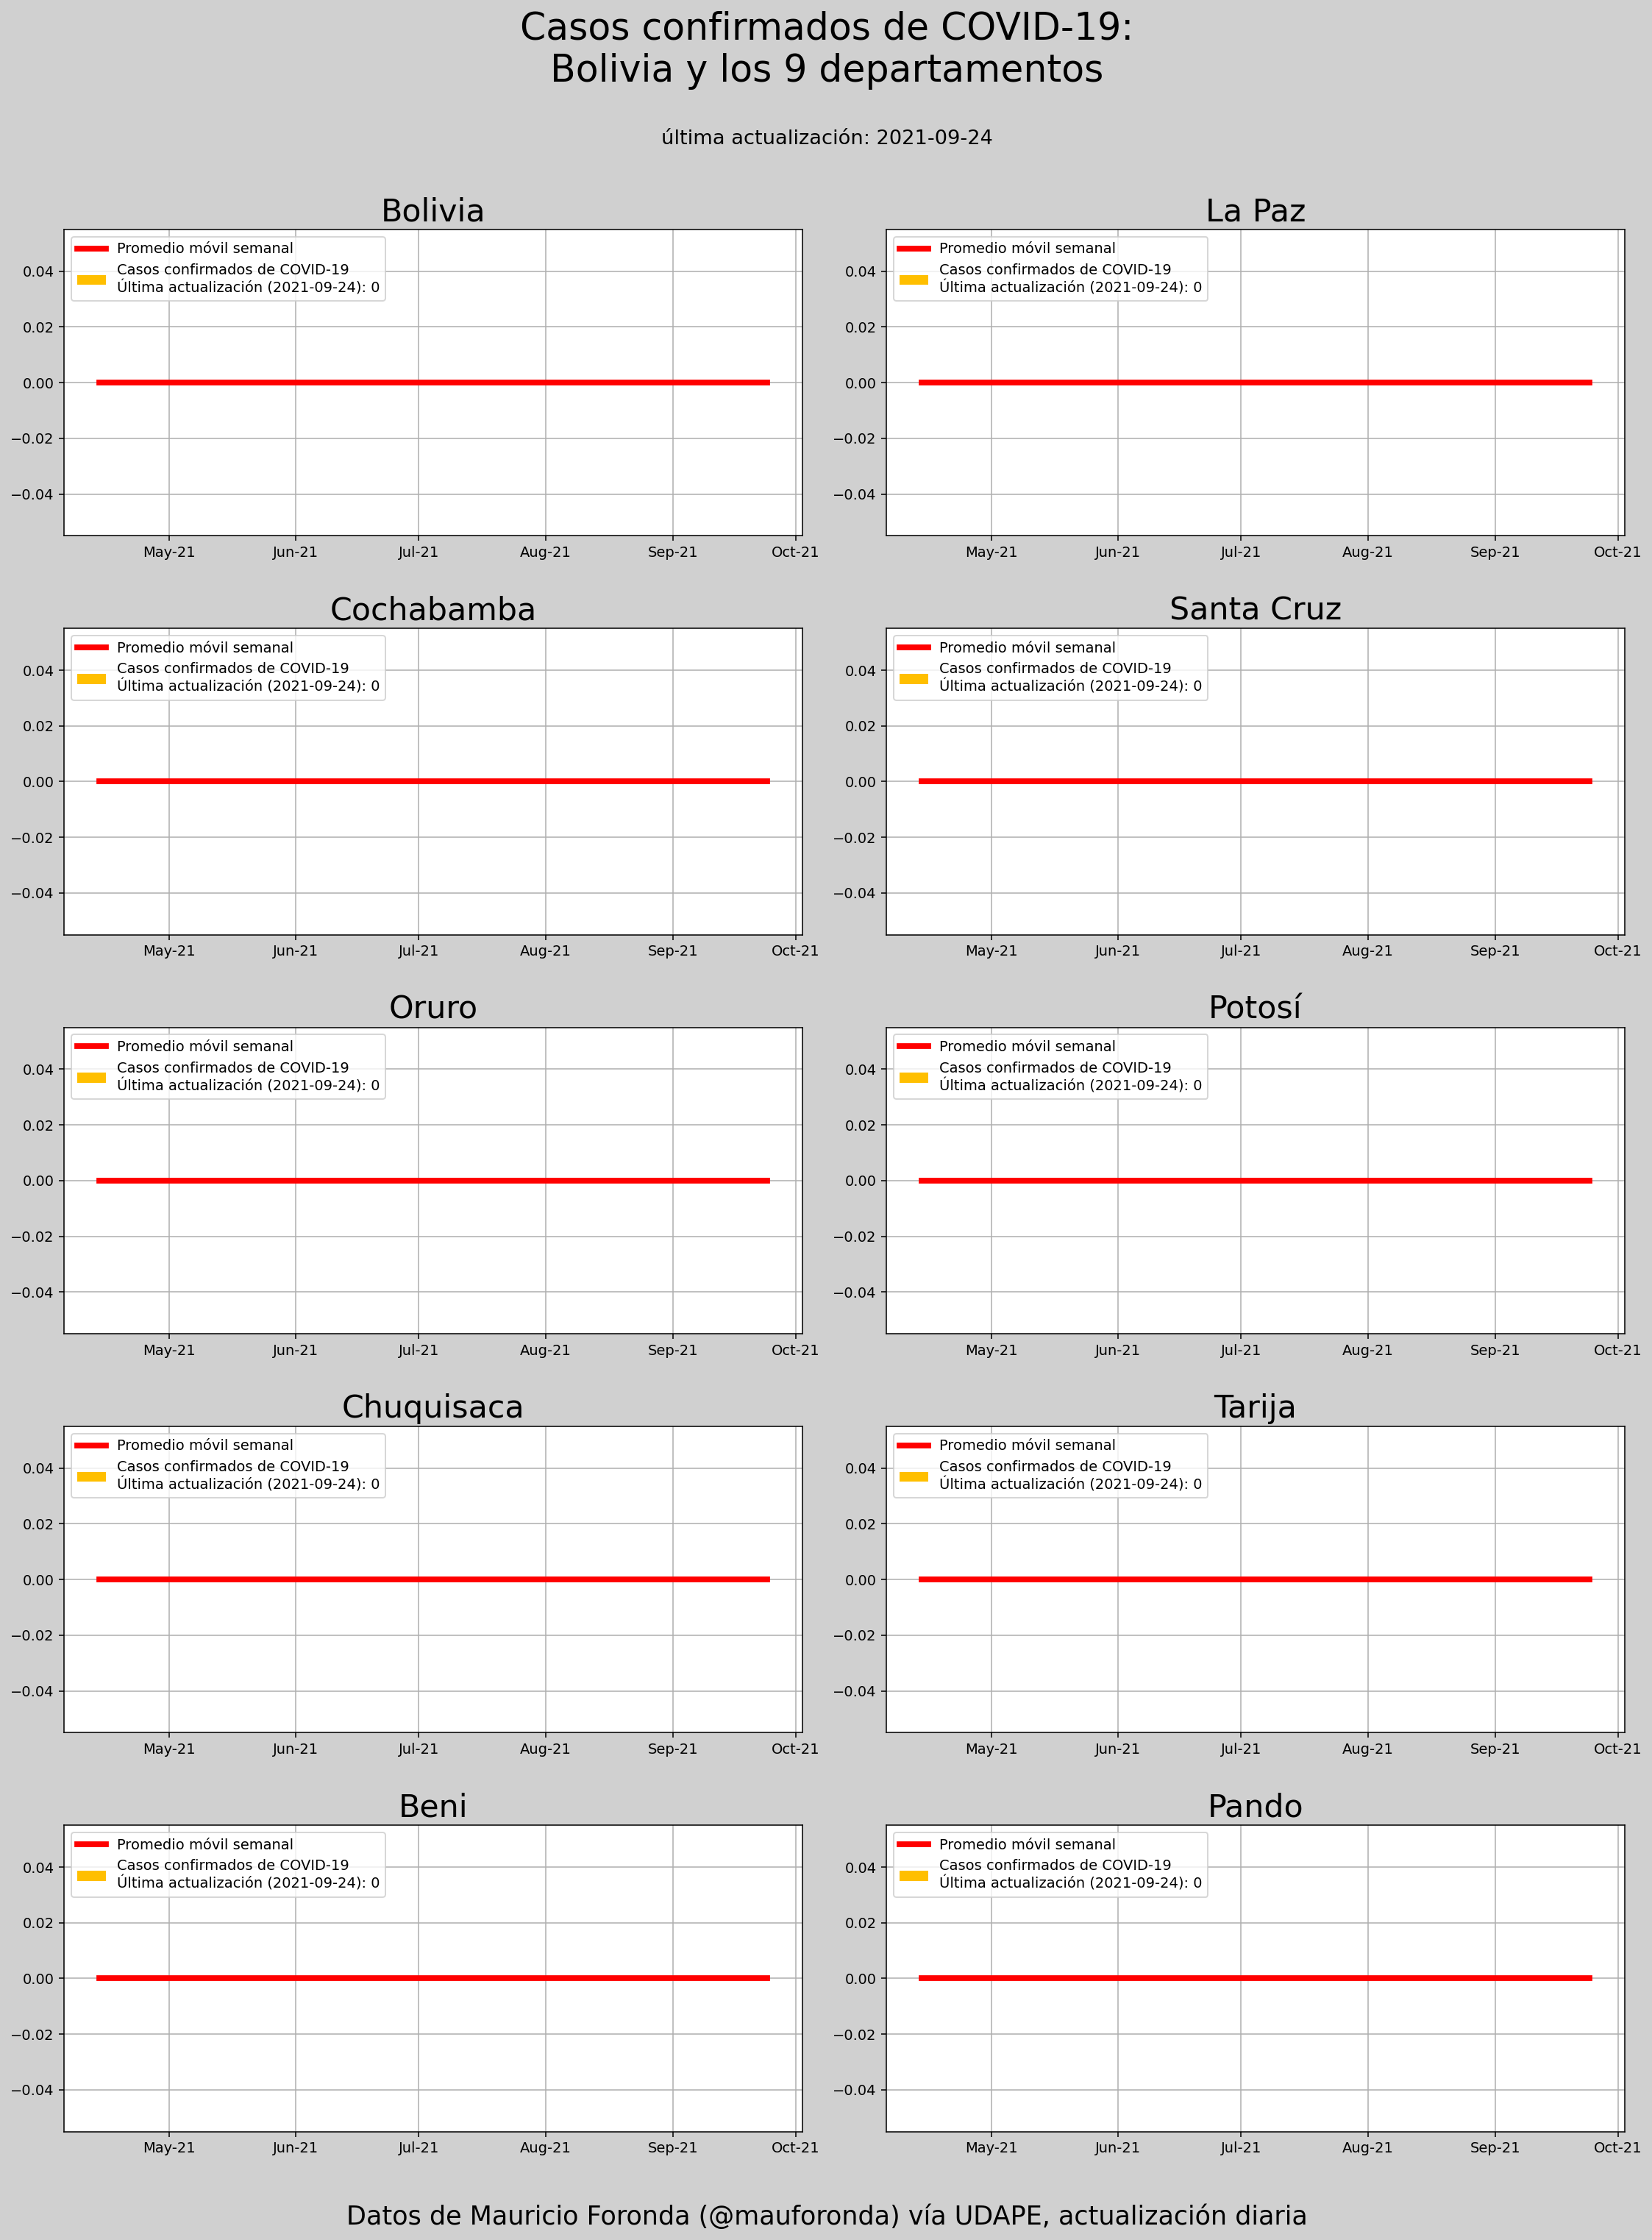

In [8]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140
                        )
axs = axs.flatten()

background_color1 = "#d0d0d0"
background_color2 = "w"
fig.set_facecolor(background_color1)

fig.suptitle("Casos confirmados de COVID-19:\nBolivia y los 9 departamentos", fontsize= 26, y=1.045)
fig.text(.5, .98, "última actualización: {}".format(casos_diarios.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)

start_day = 400

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_diarios.index[start_day:], casos_diarios[casos_diarios.columns[i]][start_day:], 
             color = "#ffbf00", 
             label="Casos confirmados de COVID-19\nÚltima actualización ({}): {}".format(casos_diarios.index[-1].date(),casos_diarios.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_diarios.columns[i], fontsize = 22)
  axs[i].plot(casos_diarios.index[start_day:], casos_diarios7[casos_diarios7.columns[i]][start_day:], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  #axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
  #axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
  axs[i].legend(loc="upper left")
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "Promedio\núltimo:\n" + str(casos_diarios7.iloc[-1,i].astype(int)),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .9}
          )

  
fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)

In [9]:
fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

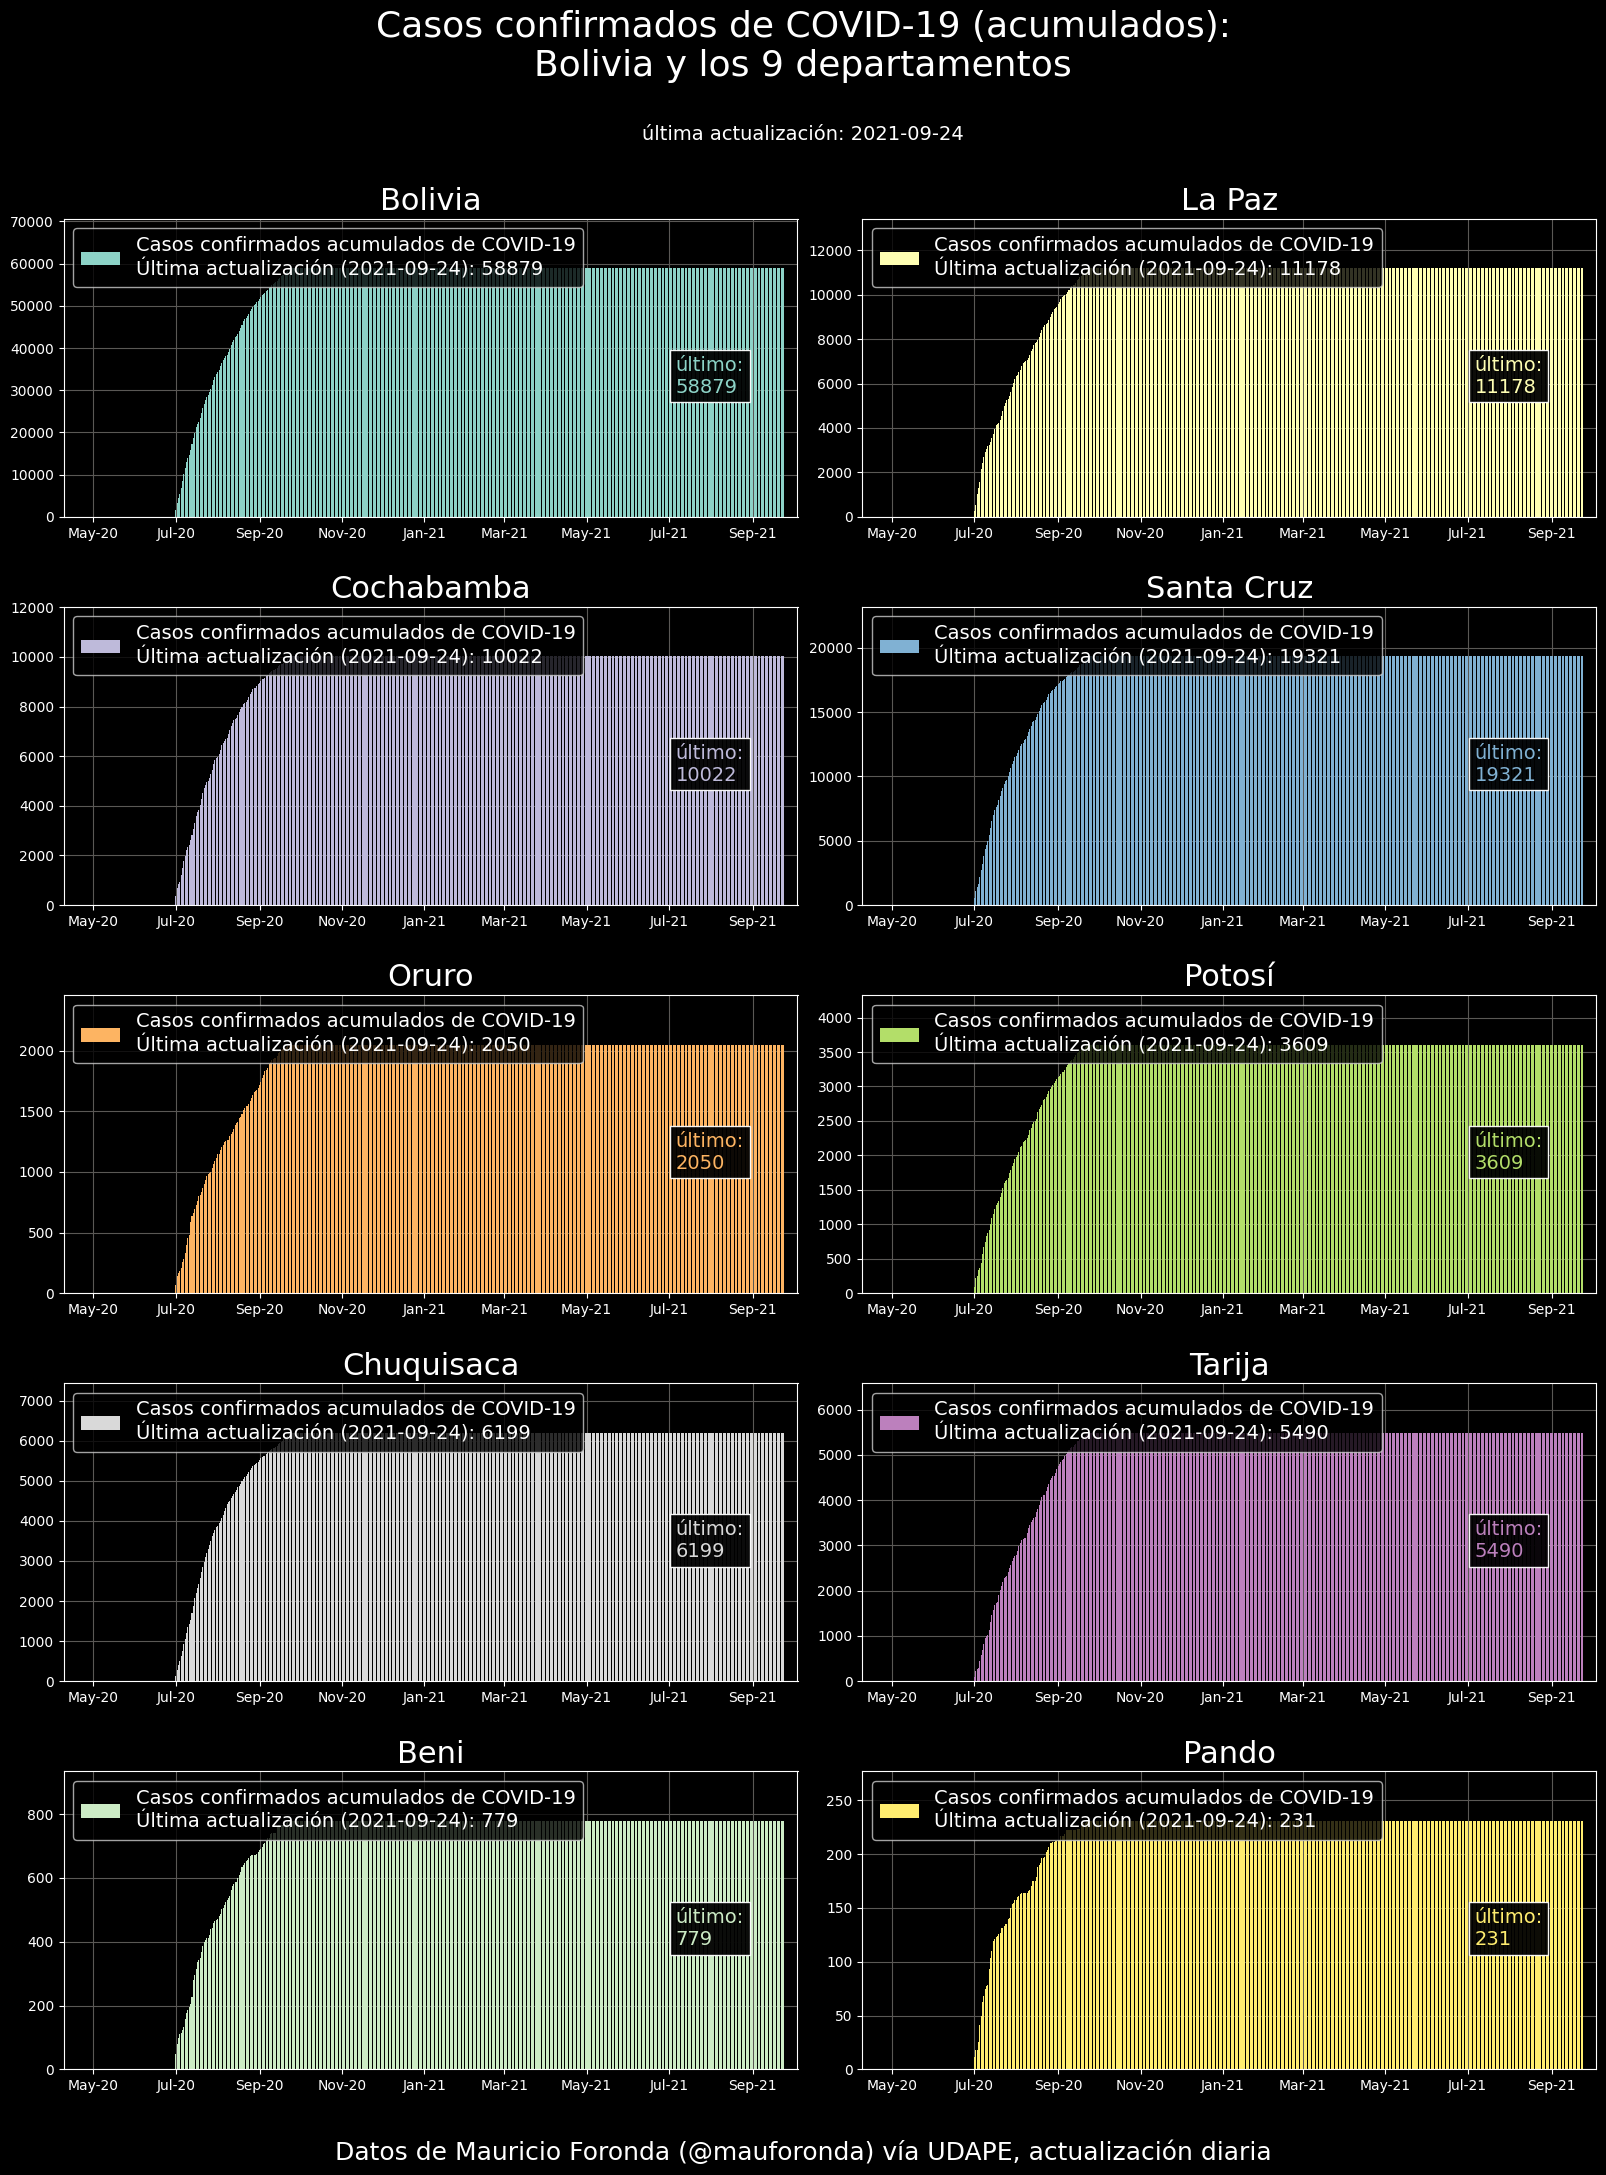

In [10]:
plt.style.use("dark_background")
fig, axs = plt.subplots(5,2, figsize = (16,20), 
                        dpi=100,
                        sharey=False
                        )
axs = axs.flatten()

background_color1 = "#d0d0d0"
background_color2 = "w"
#fig.set_facecolor(background_color1)



fig.suptitle("Casos confirmados de COVID-19 (acumulados):\nBolivia y los 9 departamentos", fontsize= 26, y=1.045)
fig.text(.5, .98, "última actualización: {}".format(casos_acumulados.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)




for i in range(10):
  axs[i].grid(zorder=3, color="#5a5855")
  axs[i].bar(casos_acumulados.index, casos_acumulados[casos_acumulados.columns[i]], 
             color = cm.get_cmap("Set3",10)(range(10))[i], 
             label="Casos confirmados acumulados de COVID-19\nÚltima actualización ({}): {}".format(casos_acumulados.index[-1].date(),casos_acumulados.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_acumulados.columns[i], fontsize = 22)
  #axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  #axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_acumulados[casos_acumulados.columns[i]].max()*1.20)
  axs[i].set_xlim(casos_acumulados.index[30], casos_acumulados.index[-1] + datetime.timedelta(days=10))
  axs[i].legend(loc="upper left", fontsize=14)
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "último:\n" + str(casos_acumulados.iloc[-1,i].astype(int)),
      xy = (casos_acumulados.index[-1] - datetime.timedelta(days=80), casos_acumulados.iloc[-1,i]/2),
      fontsize=14,
      color = cm.get_cmap("Set3",10)(range(10))[i],
      bbox={
              'edgecolor': 'w',
              'facecolor': 'black', 
              'alpha': .95}
          )


fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)
plt.style.use("default")


In [11]:
fig.savefig(directory + "graficas/casos_todos_acum.jpg", bbox_inches="tight")

# Muertes

Muertes diarias y acumuladas

In [12]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,0,0,0,0,0,0,0,0,0,0
2021-09-21,0,0,0,0,0,0,0,0,0,0
2021-09-22,0,0,0,0,0,0,0,0,0,0
2021-09-23,0,0,0,0,0,0,0,0,0,0


In [13]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
muertes_diarias7.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-09-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,1871,301,210,610,169,141,207,169,53,11
2021-09-21,1871,301,210,610,169,141,207,169,53,11
2021-09-22,1871,301,210,610,169,141,207,169,53,11
2021-09-23,1871,301,210,610,169,141,207,169,53,11


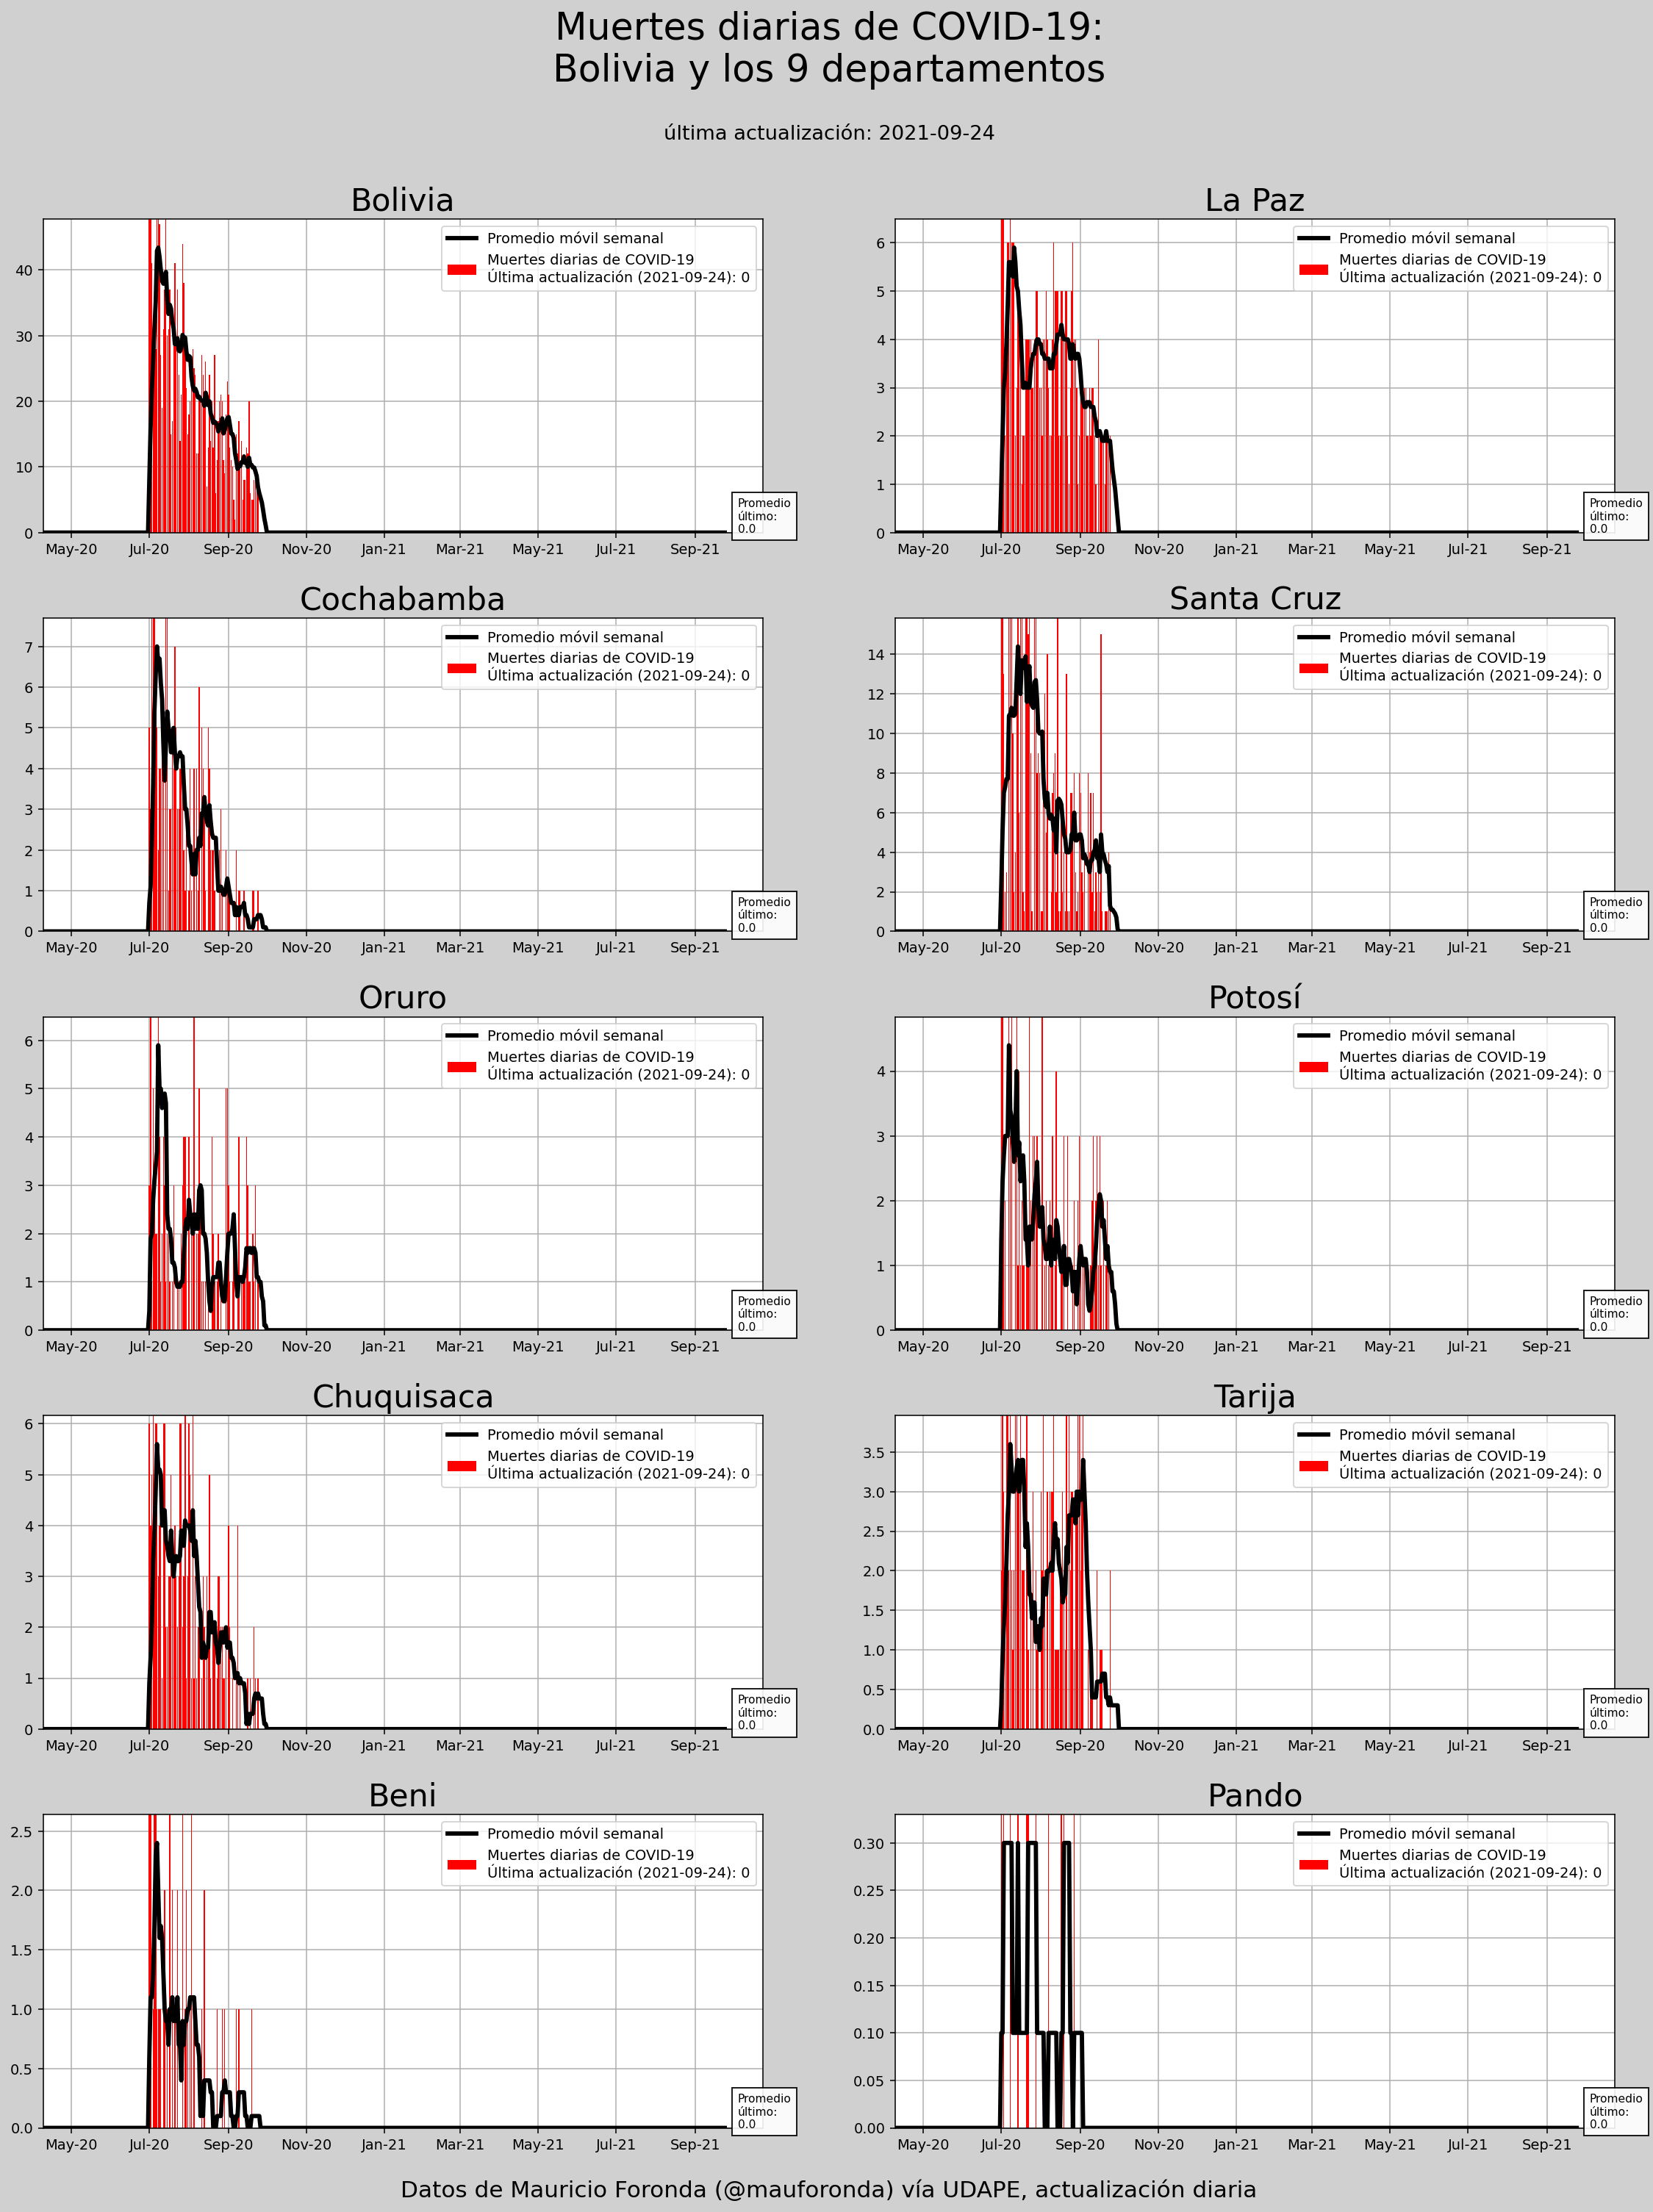

In [15]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)

axs = axs.flatten()


background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Muertes diarias de COVID-19:\nBolivia y los 9 departamentos", fontsize= 26, y=1.043)
fig.text(0.5, .98,"última actualización: {}".format(muertes_diarias.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.02,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=16)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(muertes_diarias.index, muertes_diarias[muertes_diarias.columns[i]], color = "r", 
             label="Muertes diarias de COVID-19\nÚltima actualización ({}): {}".format(muertes_diarias.index[-1].date(),muertes_diarias.iloc[-1,i].astype(int)),
             width=.75 ,zorder=2)
  axs[i].set_title(muertes_diarias.columns[i], fontsize=22)
  axs[i].plot(muertes_diarias.index, muertes_diarias7[muertes_diarias7.columns[i]], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.1)
  axs[i].set_xlim(muertes_diarias.index[30], muertes_diarias.index[-1] + datetime.timedelta(days=30))
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "Promedio\núltimo:\n" + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=10), muertes_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .9}
          )

  #axs[i].text(muertes_diarias7.index[30], muertes_diarias7[muertes_diarias7.columns[i]].max()*1.12,"última actualización: {}".format(muertes_diarias7.index[-1].date()), fontsize=5)

fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

In [16]:
muertes_fig = fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [17]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

#pruebas_edu

In [18]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [19]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [20]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [21]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]


pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-09-20,1916589.0,390143.0,360878.0,765283.0,71261.0,62365.0,95085.0,95877.0,55381.0,20316.0
2021-09-21,1916589.0,390143.0,360878.0,765283.0,71261.0,62365.0,95085.0,95877.0,55381.0,20316.0
2021-09-22,1916589.0,390143.0,360878.0,765283.0,71261.0,62365.0,95085.0,95877.0,55381.0,20316.0
2021-09-23,1916589.0,390143.0,360878.0,765283.0,71261.0,62365.0,95085.0,95877.0,55381.0,20316.0
2021-09-24,1916589.0,390143.0,360878.0,765283.0,71261.0,62365.0,95085.0,95877.0,55381.0,20316.0


In [22]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,272.000000,105.000000,44.00,88.000000,7.0,14.000000,1.000000,10.0,NaN,3.000000
2020-05-09,358.000000,110.500000,42.50,97.000000,5.0,15.000000,13.500000,5.5,9.000000,4.166667
2020-05-10,386.666667,94.666667,31.00,148.333333,9.0,19.666667,17.666667,5.5,7.000000,4.555556
2020-05-11,401.000000,90.750000,24.25,225.500000,10.0,16.375000,16.000000,4.0,7.666667,4.750000
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


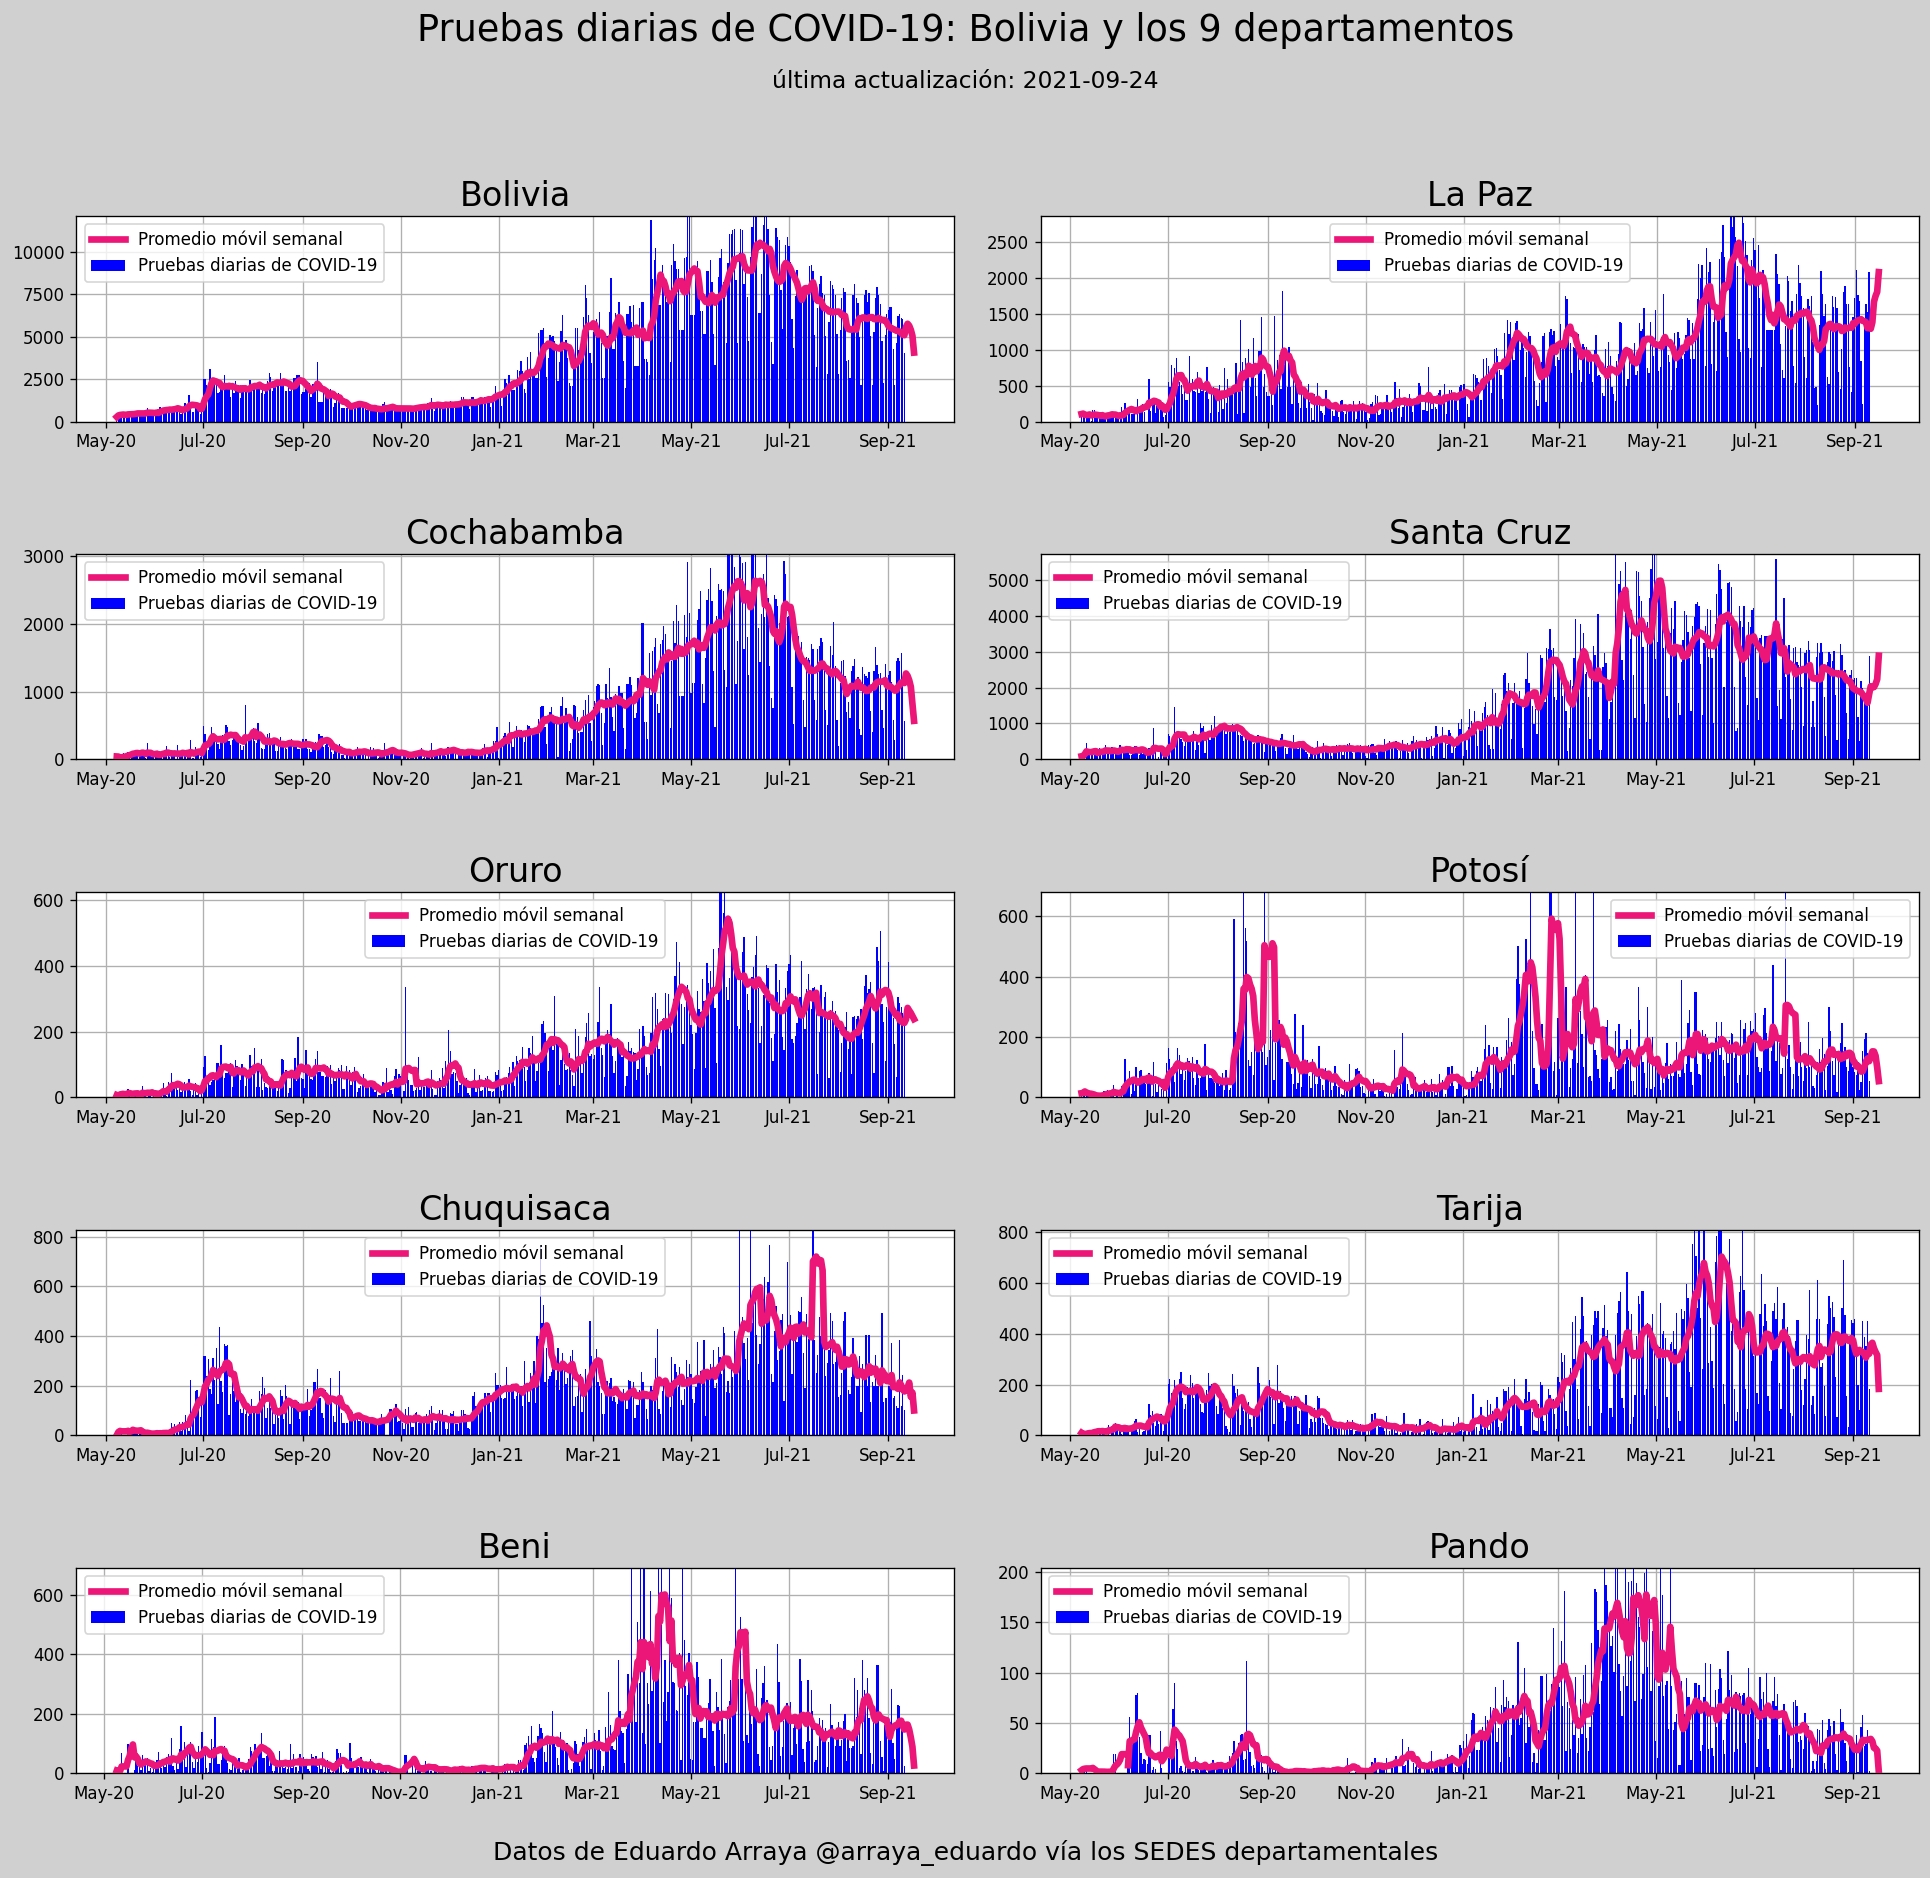

In [24]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=120)
axs = axs.flatten()

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.07)
fig.text(0.5,-.03,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=15, ha="center")
fig.text(0.5, 1.025,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14, ha="center")

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Promedio\núltimo:\n" + str(pruebas_diarias7.iloc[-1,i].astype(int)),
      xy = (pruebas_diarias7.index[-1] + datetime.timedelta(days=10), pruebas_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "#EB1677",
      bbox={
              'edgecolor': "#EB1677",
              'facecolor': 'w', 
              'alpha': .9}
          )


fig.tight_layout(pad=0.4, w_pad=2, h_pad=4)

fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [25]:
positividad_diaria_raw = casos_diarios / pruebas_diarias
positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])


positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2020-05-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2020-05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-12,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# positividad_diaria.plot(figsize = (20,7))
# plt.ylim(0,1)
# plt.title("Positividad diaria de pruebas COVID-19 en Bolivia")

In [27]:
positividad_diaria_adj = positividad_diaria_raw.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2020-05-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


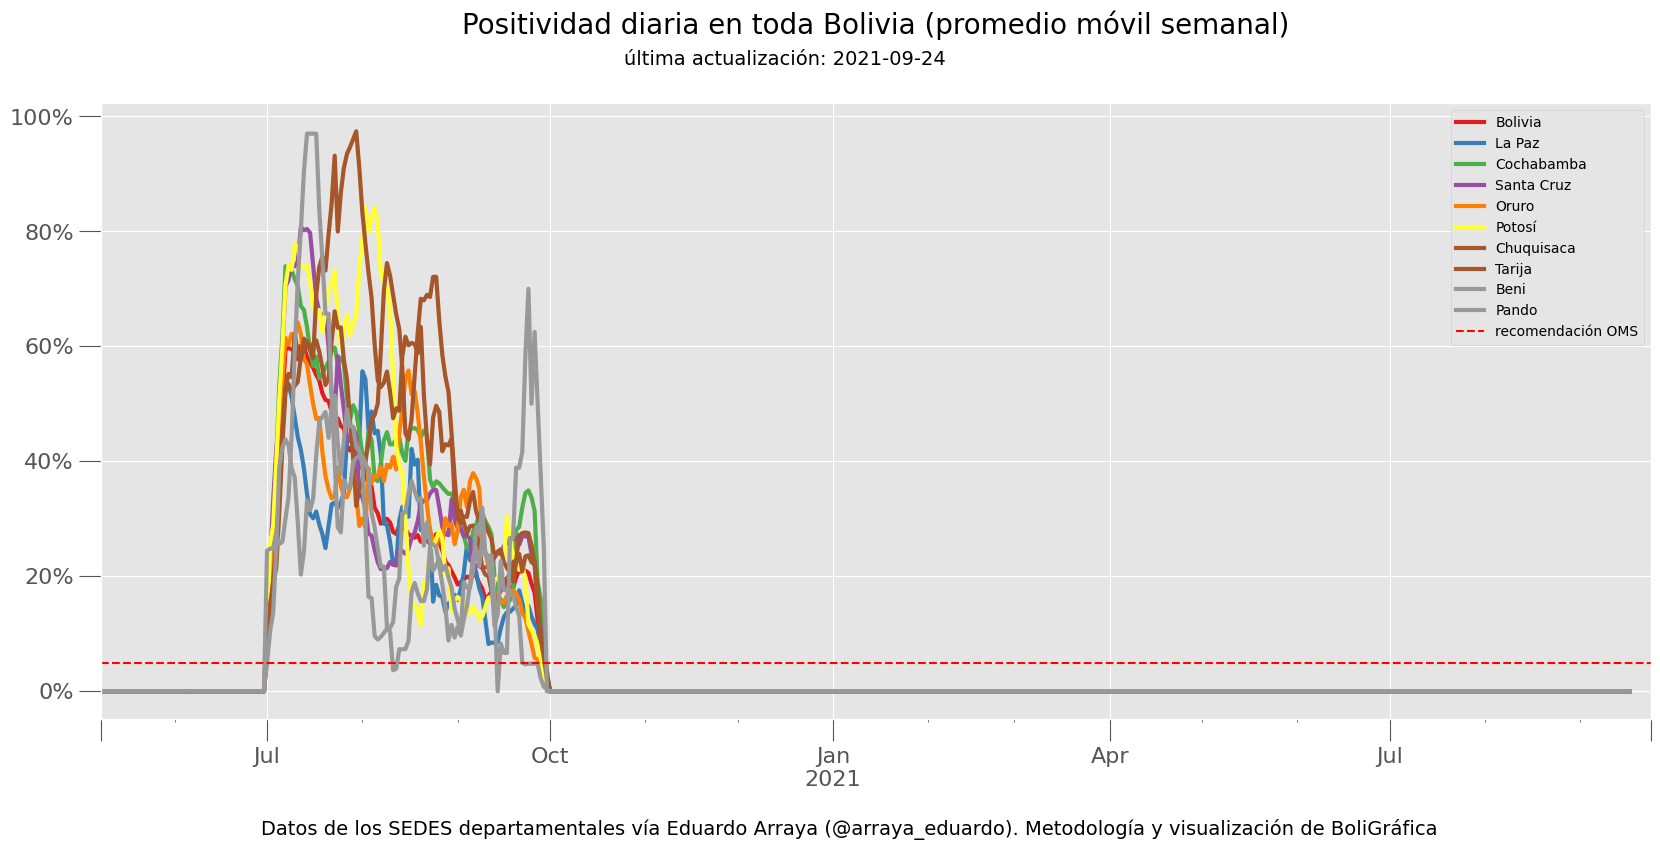

In [28]:
plt.style.use("ggplot")

ax = positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3, color= cm.get_cmap("Set1",10)(range(10)))

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia (promedio móvil semanal)", fontsize =20, y=1.1)

plt.text(18442,-.25,"Datos de los SEDES departamentales vía Eduardo Arraya (@arraya_eduardo). Metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18560, 1.09,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(size=16)
ax.axhline(y = .05, color="r", linestyle="dashed", label= "recomendación OMS")
ax.legend()
plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", bbox_inches="tight", dpi=120)

/opt/hostedtoolcache/Python/3.9.7/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/hostedtoolcache/Python/3.9.7/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


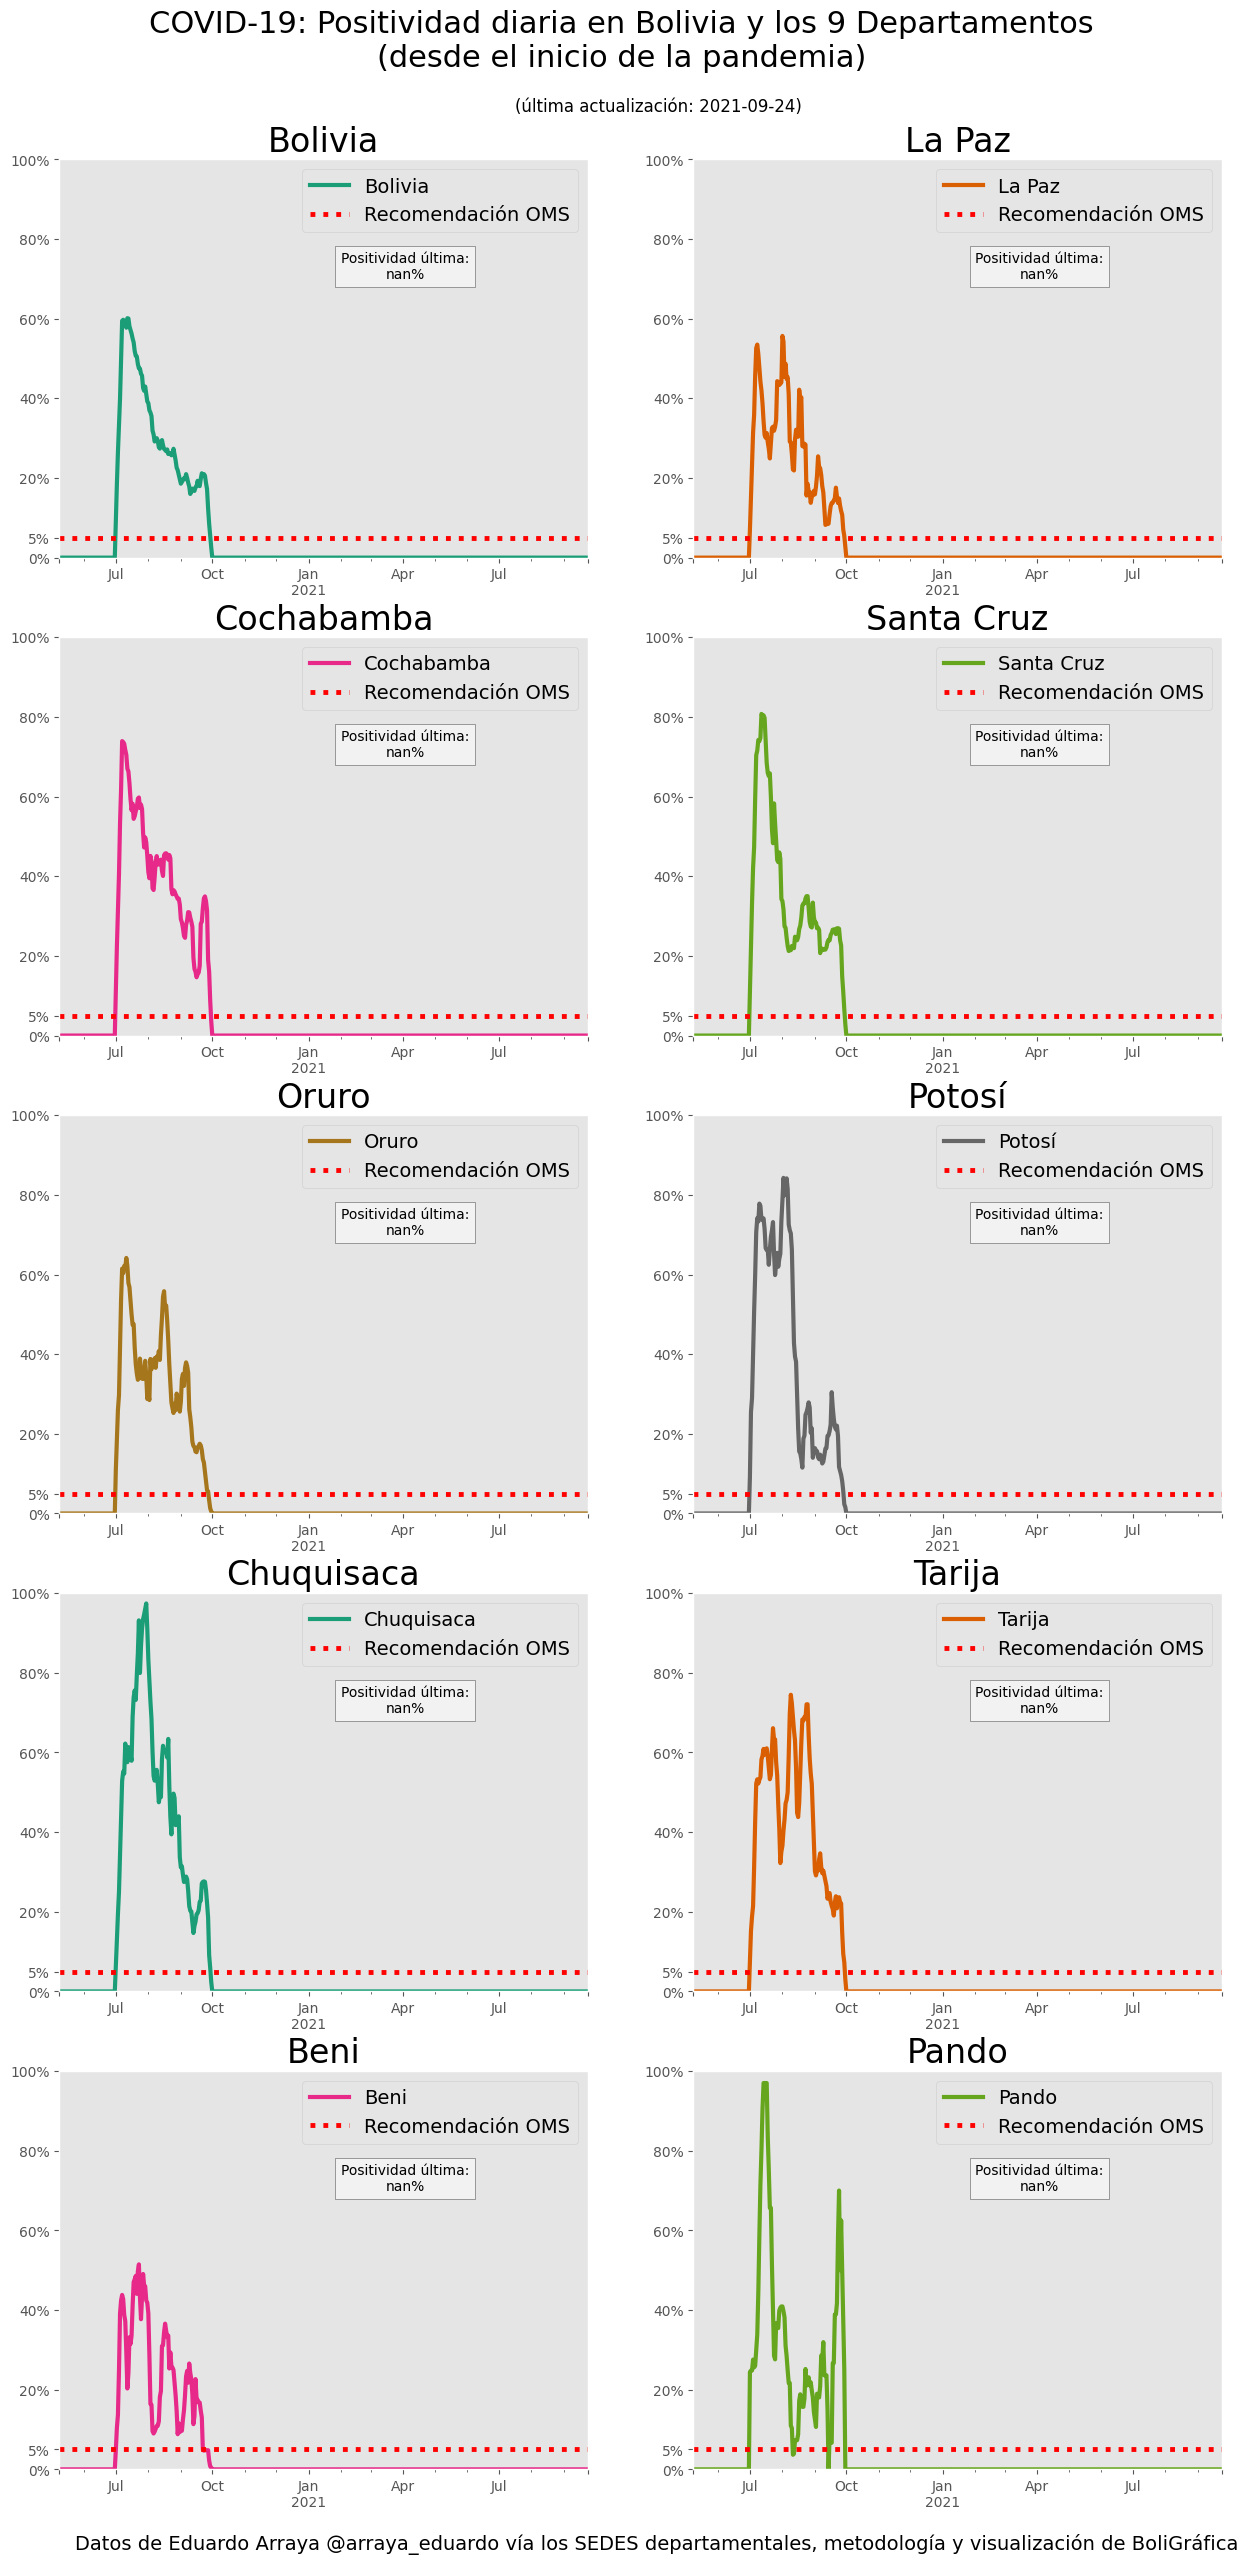

In [29]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3, 
                                                color=cm.get_cmap("Dark2",6)(range(6)))

axs[0][0].get_figure().suptitle('COVID-19: Positividad diaria en Bolivia y los 9 Departamentos\n(desde el inicio de la pandemia)', y=.93, fontsize = 22)
axs = axs.flatten()

for i in range(10):
  axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
  axs[i].grid()
  axs[i].text(18720,.7, "Positividad última:\n{}%".format((positividad_diaria_adj.iloc[-1,i]*100).round(1)), ha="center",
              bbox={
              'edgecolor': "black",
              'facecolor': 'w', 
              'alpha': .5}
          )


plt.text(17800, -.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18220, 5.92,"(última actualización: {})".format(pruebas_diarias.index[-1].date()), fontsize=12)
plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", bbox_inches="tight", dpi=120)

In [30]:
# axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

# axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
# axs = axs.flatten()

# for i in range(10):
#   axs[i].grid()
#   axs[i].set_ylim(0,1)
#   axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
#   axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
#   axs[i].legend()
#   axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


# plt.savefig(directory + "positividad_2021.jpg")

# MIX

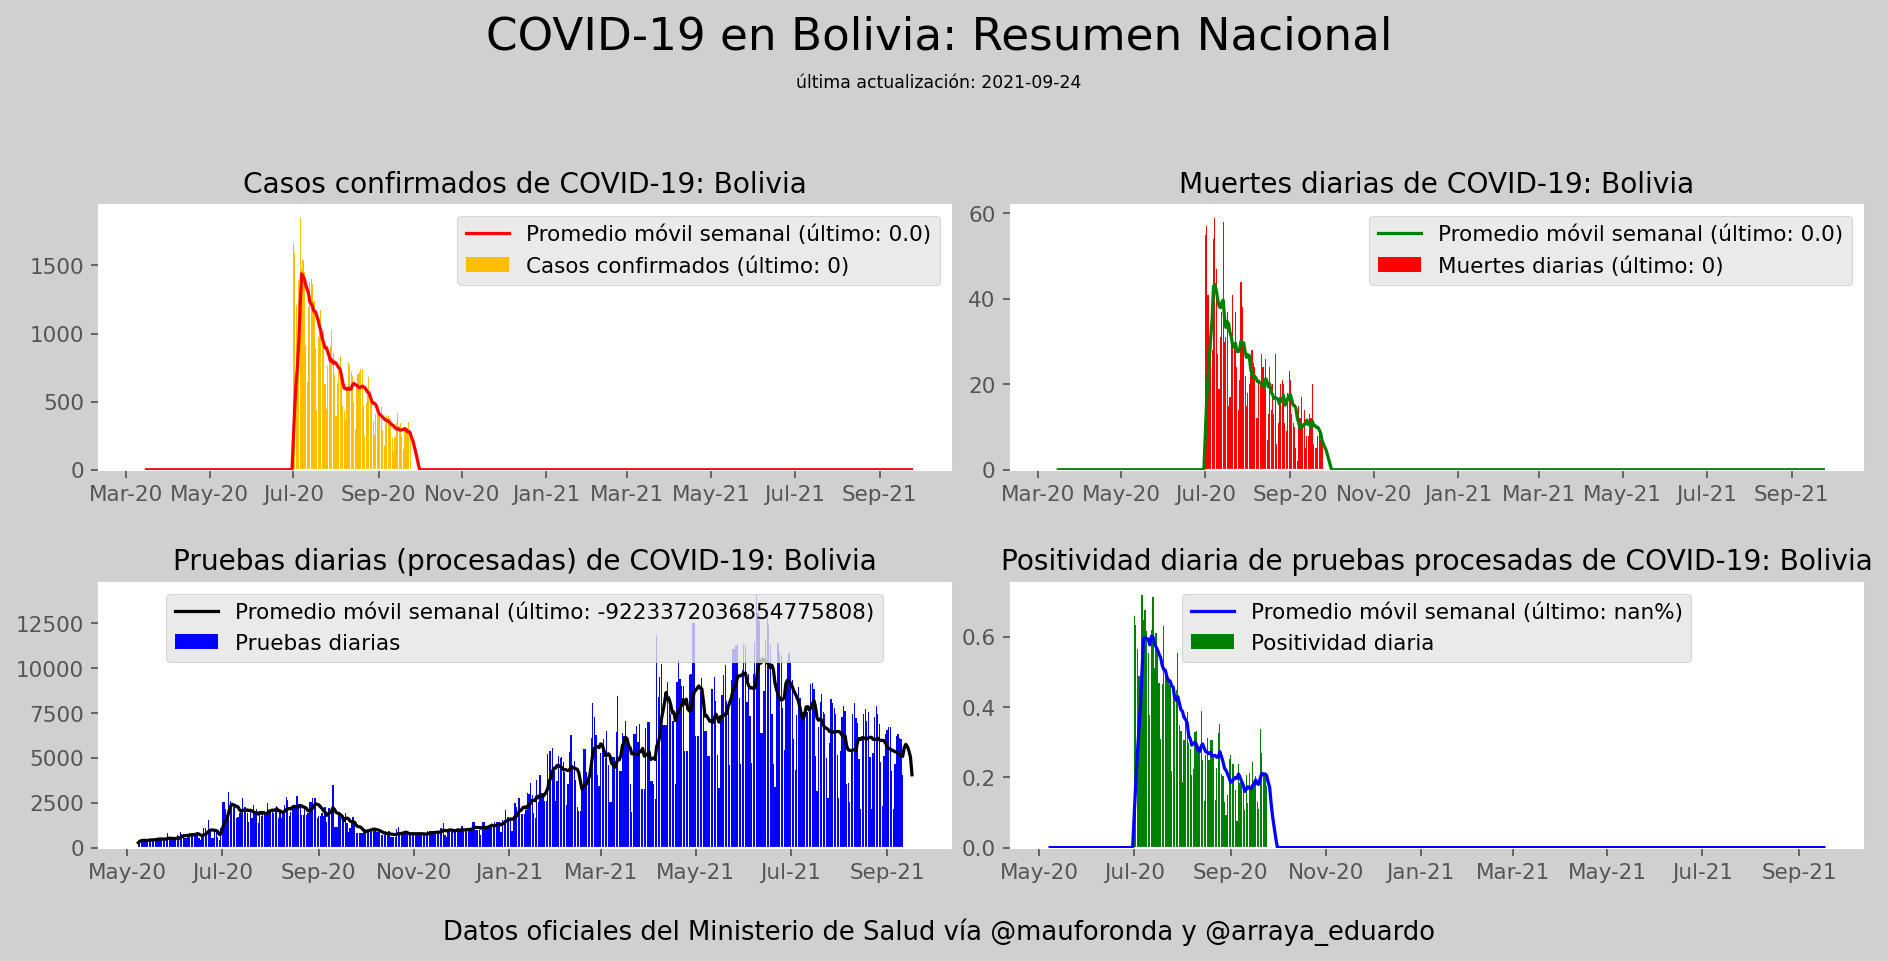

In [31]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: Resumen Nacional", fontsize= 21, y=1.128)
fig.text(0.5,-.065,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=12, ha="center")
fig.text(.5, 1.035,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8, ha="center")

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados (último: {})".format(casos_diarios.Bolivia.iloc[-1].astype(int)),width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3)
axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias (último: {})".format(muertes_diarias.Bolivia.iloc[-1]),width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3)
axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias", width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3)
axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3)
axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

# ACTIVOS


In [32]:
activos = casos_diarios.rolling(14).sum()      #-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos.to_csv(directory + "activos.csv")
activos

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


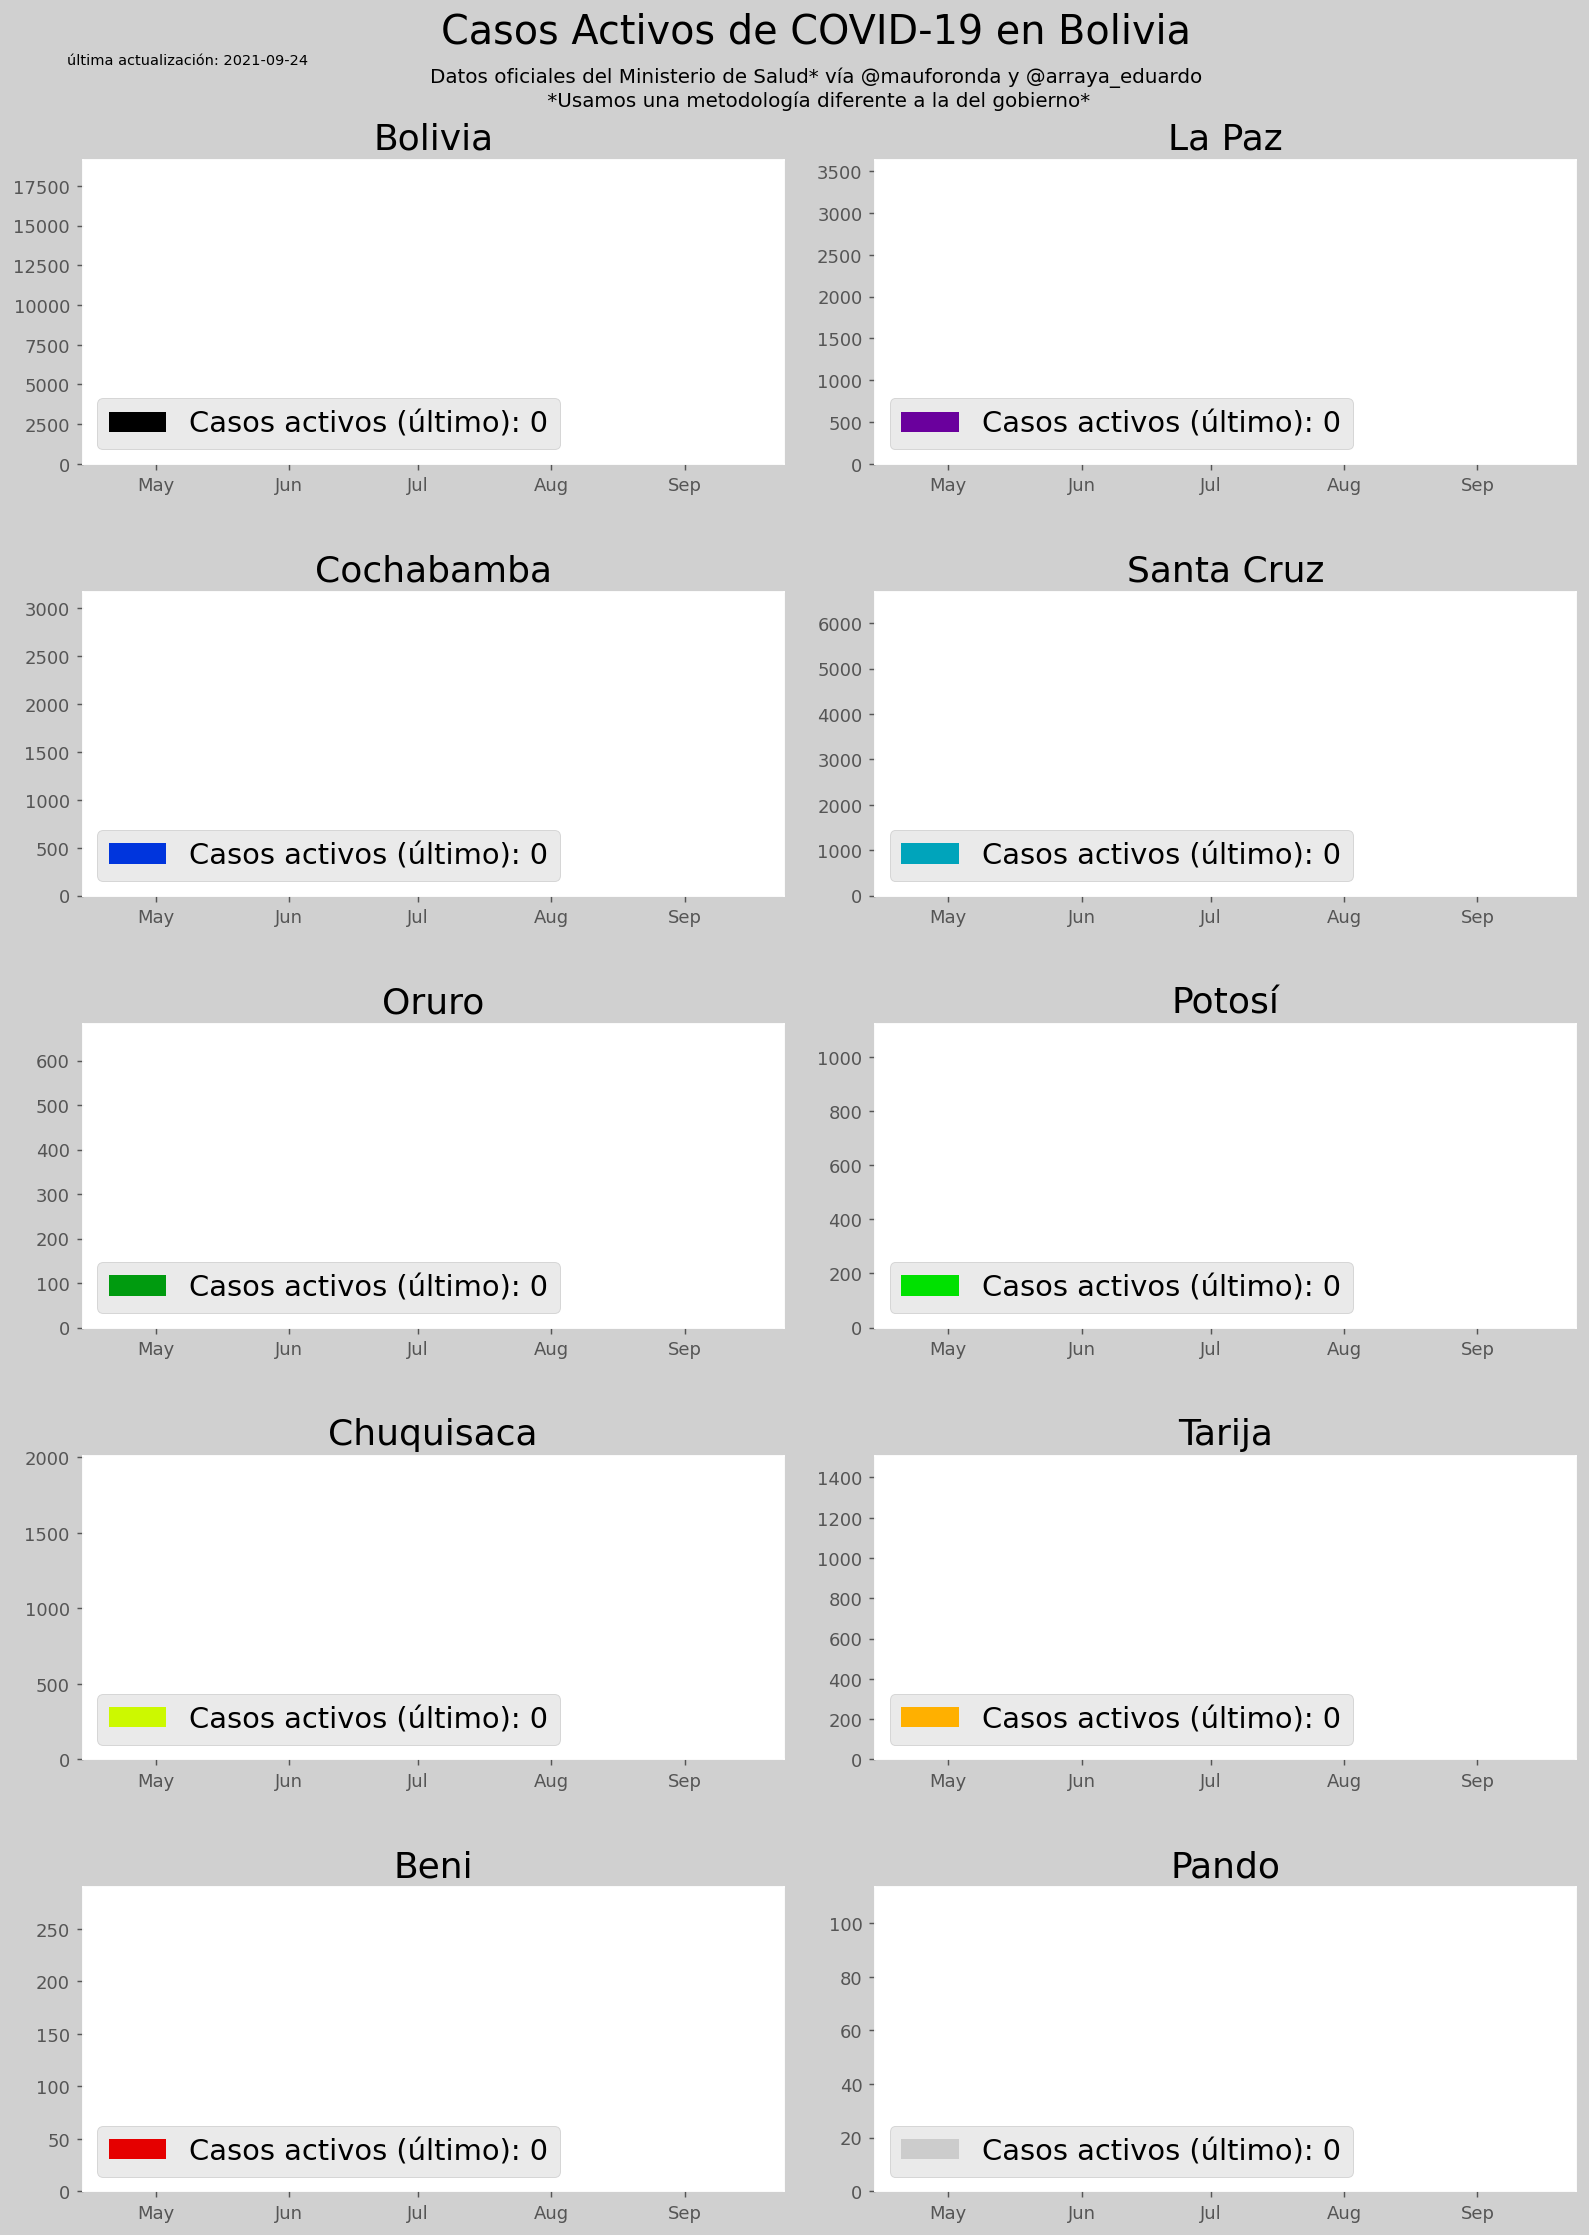

In [33]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=130)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia", fontsize= 22, y=1.065)
fig.text(0.5,1.02,"Datos oficiales del Ministerio de Salud* vía @mauforonda y @arraya_eduardo\n *Usamos una metodología diferente a la del gobierno*", fontsize=11, ha="center")
fig.text(.02, 1.04,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=20) 
   axs[i].bar(activos.index, activos[activos[400:-1].columns[i]], label="Casos activos (último): {}".format(activos.iloc[-1,i].astype(int)),
              width=.85, zorder=2, 
              color = cm.get_cmap("nipy_spectral",10)(range(10))[i])
   axs[i].set_facecolor(background_color2)
   axs[i].legend(fontsize=16, loc="lower left")
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[400], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)



fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [34]:
activos_ultimo = activos[-1:]
activos_ultimo.T


,2021-09-24
Bolivia,0.0
La Paz,0.0
Cochabamba,0.0
Santa Cruz,0.0
Oruro,0.0
Potosí,0.0
Chuquisaca,0.0
Tarija,0.0
Beni,0.0
Pando,0.0


In [35]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


,"Activos por cada 10,000 habitantes"
Bolivia,0.0
La Paz,0.0
Cochabamba,0.0
Santa Cruz,0.0
Oruro,0.0
Potosí,0.0
Chuquisaca,0.0
Tarija,0.0
Beni,0.0
Pando,0.0


/tmp/ipykernel_1595/2124506778.py:13: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.2)
/tmp/ipykernel_1595/2124506778.py:30: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axs[1].set_ylim(0,activos_ultimo_pc.T[1:10][activos_ultimo_pc.T.columns[0]].max()*12)


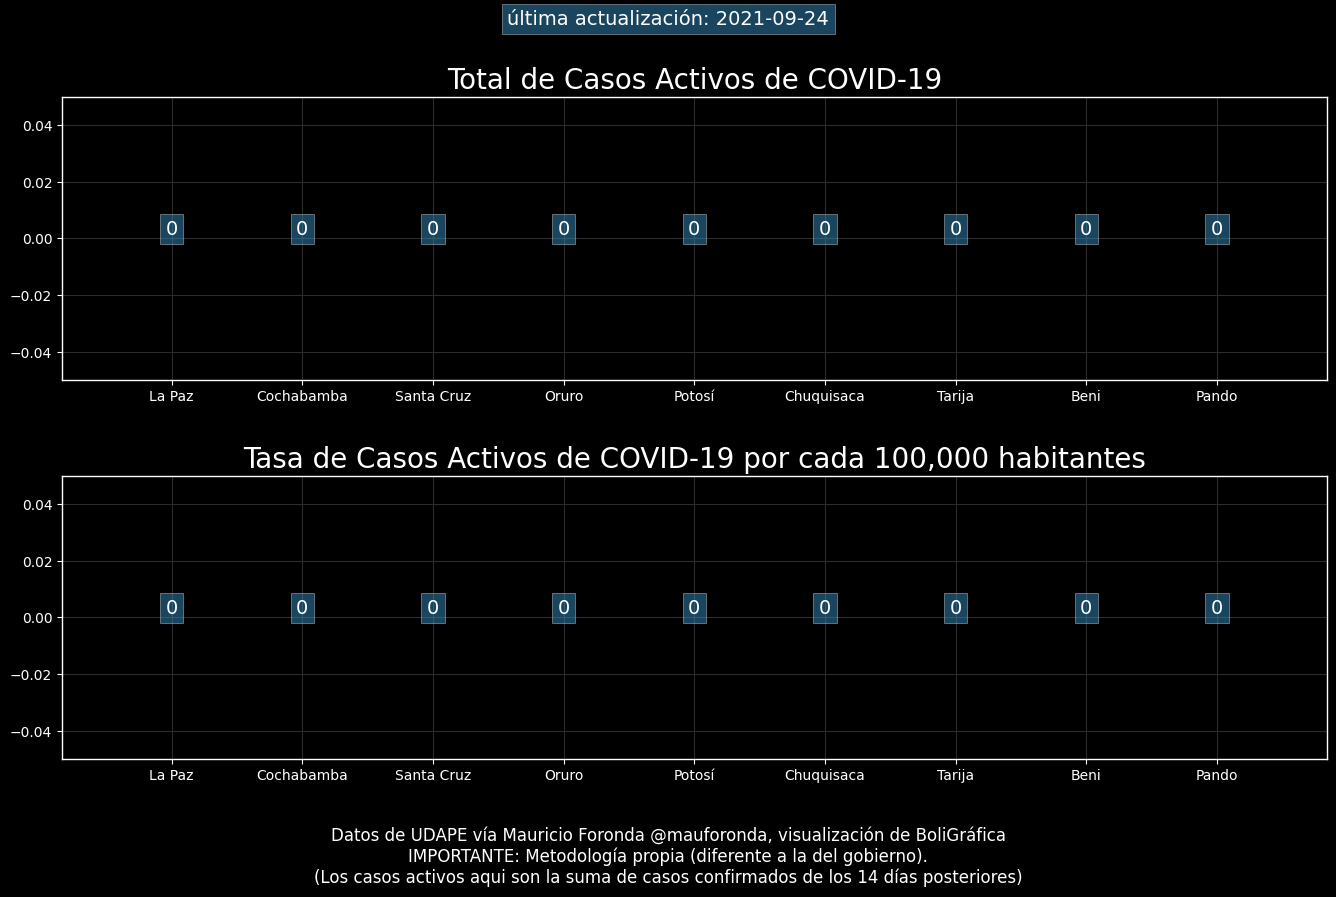

In [36]:
plt.style.use("dark_background")

fig, axs = plt.subplots(2,1, figsize=(14,8))

fig.text(.5, 1,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=14, ha="center", bbox={"alpha":0.5})
fig.text(0.5,-.073,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica\nIMPORTANTE: Metodología propia (diferente a la del gobierno).\n(Los casos activos aqui son la suma de casos confirmados de los 14 días posteriores)", 
         fontsize=12, ha="center")

bar1 = axs[0].bar(activos_ultimo.T.index[1:10], 
           activos_ultimo.T[1:10][activos_ultimo.T.columns[0]],
           color = cm.get_cmap("viridis",10)(range(10)))
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.2)
axs[0].bar_label(bar1, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[0].grid(axis="both", color = "#2b2b2a")


bar2 = axs[1].bar(activos_ultimo_pc.T.index[1:10], 
           (activos_ultimo_pc.T[1:10]["Activos por cada 10,000 habitantes"]*10).astype(int),
           color = cm.get_cmap("viridis",10)(range(10)))
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 100,000 habitantes", fontsize = 20)
axs[1].bar_label(bar2, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[1].grid(axis="both", color = "#2b2b2a")
axs[1].set_ylim(0,activos_ultimo_pc.T[1:10][activos_ultimo_pc.T.columns[0]].max()*12)





fig.tight_layout(pad=3)

fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")

In [37]:
plt.style.use('default')
